In [35]:
# core libraries
#%pip install matplotlib scikit-learn joblib
import numpy as np
import matplotlib.pyplot as plt

# scikit‑learn components
from sklearn.datasets import load_digits                      # small 8×8‑pixel dataset (1 797 images)
# → For the full 28×28 MNIST set use:
# from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib


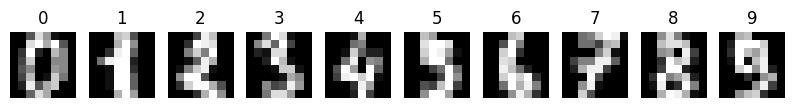

In [36]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

# Display the first 10 digit images
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(digits.target[i])
    ax.axis('off')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)


In [38]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000,
        n_jobs=-1
    ))
])


tune the regularisation strength

In [39]:
param_grid = {"clf__C": [0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_["clf__C"])
pipe = grid.best_estimator_      # overwrite with tuned model


/home/izy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/izy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/izy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/izy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecat

Best C: 1


/home/izy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


fit and model evaluation

/home/izy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



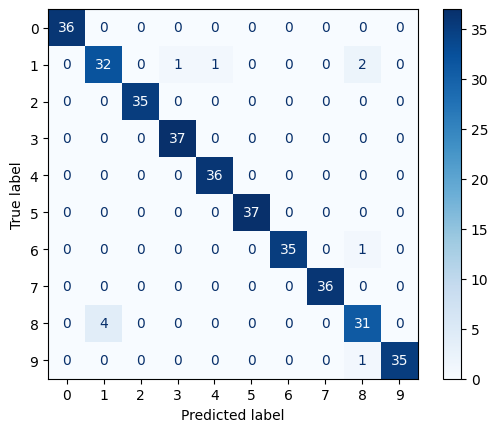

In [40]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion‑matrix visualisation
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()


model testing

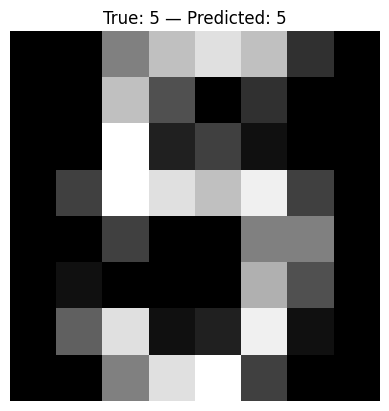

In [44]:
import matplotlib.pyplot as plt

# Pick an image index from the test set
index = 0
image = X_test[index]
label = y_test[index]

# Predict and show result
prediction = pipe.predict([image])[0]

# Visualize the digit
plt.imshow(image.reshape(8, 8), cmap="gray")
plt.title(f"True: {label} — Predicted: {prediction}")
plt.axis("off")
plt.show()


In [10]:
joblib.dump(pipe, "digits_logreg.joblib")
# later: model = joblib.load("digits_logreg.joblib")


['digits_logreg.joblib']

In [46]:
import joblib
model = joblib.load("digits_logreg.joblib")

# Predict
model.predict(X_test)


array([5, 2, 8, 8, 7, 2, 6, 2, 6, 5, 0, 5, 9, 3, 4, 4, 2, 4, 9, 9, 6, 3,
       8, 1, 2, 5, 6, 0, 3, 4, 6, 7, 2, 6, 6, 6, 8, 5, 0, 9, 1, 7, 9, 6,
       5, 7, 5, 2, 7, 5, 0, 1, 5, 5, 3, 2, 4, 0, 0, 2, 7, 5, 6, 1, 3, 7,
       6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 8, 2, 3, 5, 9, 3, 2, 7, 9, 6, 8, 1,
       0, 8, 2, 9, 4, 8, 1, 2, 7, 8, 4, 2, 6, 9, 3, 7, 3, 9, 6, 1, 1, 0,
       9, 2, 1, 6, 3, 4, 8, 7, 1, 0, 0, 4, 6, 5, 1, 2, 8, 1, 3, 0, 0, 8,
       6, 4, 3, 9, 3, 3, 3, 3, 0, 7, 0, 0, 1, 9, 5, 8, 1, 5, 0, 6, 6, 6,
       6, 1, 7, 7, 6, 7, 7, 8, 7, 3, 6, 5, 9, 0, 3, 8, 0, 9, 8, 1, 9, 5,
       9, 5, 8, 9, 9, 7, 9, 1, 9, 5, 4, 7, 3, 0, 4, 9, 7, 7, 5, 6, 5, 8,
       3, 4, 5, 4, 9, 2, 5, 5, 2, 1, 3, 8, 8, 9, 3, 6, 1, 0, 1, 4, 0, 5,
       5, 6, 6, 7, 4, 3, 8, 4, 4, 0, 7, 9, 2, 1, 4, 8, 4, 2, 4, 0, 0, 0,
       2, 6, 7, 0, 4, 5, 2, 2, 9, 0, 4, 6, 8, 2, 3, 9, 2, 3, 0, 6, 8, 7,
       1, 4, 4, 1, 1, 6, 3, 8, 1, 2, 5, 7, 8, 3, 2, 0, 3, 4, 1, 9, 9, 9,
       6, 3, 7, 1, 6, 9, 4, 7, 1, 8, 1, 3, 0, 5, 3,

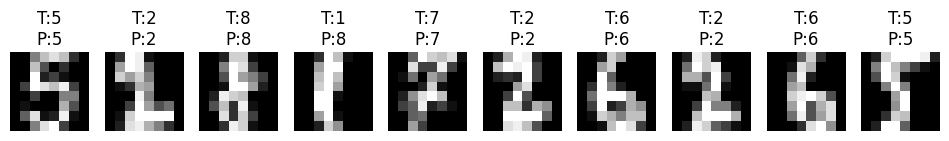

In [ ]:
# Visualize the first 10 test images with predictions
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"T:{y_test[i]}\nP:{predictions[i]}")
    ax.axis('off')
plt.show()

#there is an error at line array[0]

TESTING ON LOCAL DIGIT IMAGES

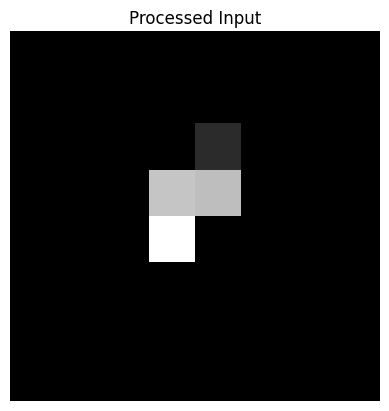

In [64]:
#%pip install matplotlib scikit-learn opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

# Load your image (e.g., 'my_digit.png') — must be a **white digit on black background**
img = cv2.imread("/home/izy/Documents/Project.2/venv/Pasted image (7).png", cv2.IMREAD_GRAYSCALE)

if img is None:
	raise FileNotFoundError("Image file not found or could not be loaded. Check the file path and name.")

# Resize to 8x8 pixels
img_resized = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)

# Invert colors: original MNIST uses black digit on white background
img_inverted = 255 - img_resized

# Normalize pixel values to 0–16 (as in scikit-learn digits dataset)
img_scaled = (img_inverted / 255.0) * 16

# Flatten into 1D array (shape: (64,))
img_flat = img_scaled.flatten().reshape(1, -1)

# Show image for confirmation
plt.imshow(img_resized, cmap="gray")
plt.title("Processed Input")
plt.axis("off")
plt.show()


In [63]:
# Load trained model
model = load("digits_logreg.joblib")

# Predict the digit
prediction = model.predict(img_flat)[0]
probabilities = model.predict_proba(img_flat)[0]

print(f"Predicted digit: {prediction}")
print("Probabilities for each class (0–9):")
print(np.round(probabilities, 2))


Predicted digit: 4
Probabilities for each class (0–9):
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


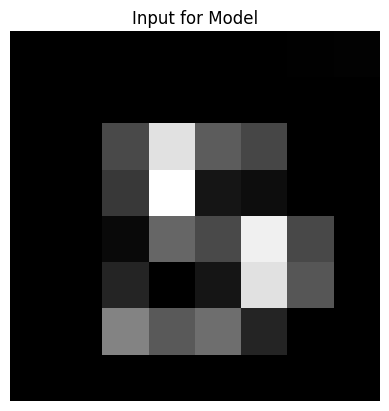

Predicted digit: 4
Class probabilities (0–9): [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from joblib import load

# Load the image
img = cv2.imread("/home/izy/Documents/Project.2/venv/Pasted image (5).png", cv2.IMREAD_GRAYSCALE)

# Resize, invert, scale and flatten
img_resized = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)
img_inverted = 255 - img_resized
img_scaled = (img_inverted / 255.0) * 16
img_flat = img_scaled.flatten().reshape(1, -1)

# Show image
plt.imshow(img_resized, cmap="gray")
plt.title("Input for Model")
plt.axis("off")
plt.show()

# Load your model
model = load("digits_logreg.joblib")

# Predict
prediction = model.predict(img_flat)[0]
probs = model.predict_proba(img_flat)[0]

print(f"Predicted digit: {prediction}")
print("Class probabilities (0–9):", np.round(probs, 2))
